# Task 1

In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mlflow.models.signature import infer_signature
import matplotlib.pyplot as plt
import joblib
import mlflow
import mlflow.sklearn


C:\Users\Javier\anacondo3_2024\envs\ml2\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
# 1) Load 2011 data
df11 = pd.read_csv("day_2011.csv")

In [3]:
df11.shape

(365, 12)

In [4]:
df11.describe

<bound method NDFrame.describe of          dteday  season  mnth  holiday  weekday  workingday  weathersit  \
0    01/01/2011       1     1        0        6           0           2   
1    02/01/2011       1     1        0        0           0           2   
2    03/01/2011       1     1        0        1           1           1   
3    04/01/2011       1     1        0        2           1           1   
4    05/01/2011       1     1        0        3           1           1   
..          ...     ...   ...      ...      ...         ...         ...   
360  27/12/2011       1    12        0        2           1           2   
361  28/12/2011       1    12        0        3           1           1   
362  29/12/2011       1    12        0        4           1           1   
363  30/12/2011       1    12        0        5           1           1   
364  31/12/2011       1    12        0        6           0           1   

         temp     atemp       hum  windspeed   cnt  
0    0.34416

In [5]:
df11.dtypes

dteday         object
season          int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [6]:
display(df11.head())

,dteday,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01/01/2011,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,02/01/2011,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,03/01/2011,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,04/01/2011,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,05/01/2011,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [7]:
print("\nMissing values:\n", df11.isna().sum())


Missing values:
 dteday        0
season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


In [8]:
df11["dteday"] = pd.to_datetime(df11["dteday"], dayfirst=True)
df11["day_of_year"] = df11["dteday"].dt.dayofyear
df11 = df11.drop(columns=["dteday"])

In [9]:
df11.dtypes

season           int64
mnth             int64
holiday          int64
weekday          int64
workingday       int64
weathersit       int64
temp           float64
atemp          float64
hum            float64
windspeed      float64
cnt              int64
day_of_year      int32
dtype: object

In [10]:
categorical_features = ["season", "mnth", "holiday", "weekday", "workingday", "weathersit"]
numeric_features = ["temp", "atemp", "hum", "windspeed", "day_of_year"]



In [11]:
df11[numeric_features].describe()

,temp,atemp,hum,windspeed,day_of_year
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.486665,0.466835,0.643665,0.191403,183.000000
std,0.189596,0.168836,0.148744,0.076890,105.510663
min,0.059130,0.079070,0.000000,0.022392,1.000000
25%,0.325000,0.321954,0.538333,0.135583,92.000000
50%,0.479167,0.472846,0.647500,0.186900,183.000000
75%,0.656667,0.612379,0.742083,0.235075,274.000000
max,0.849167,0.840896,0.972500,0.507463,365.000000


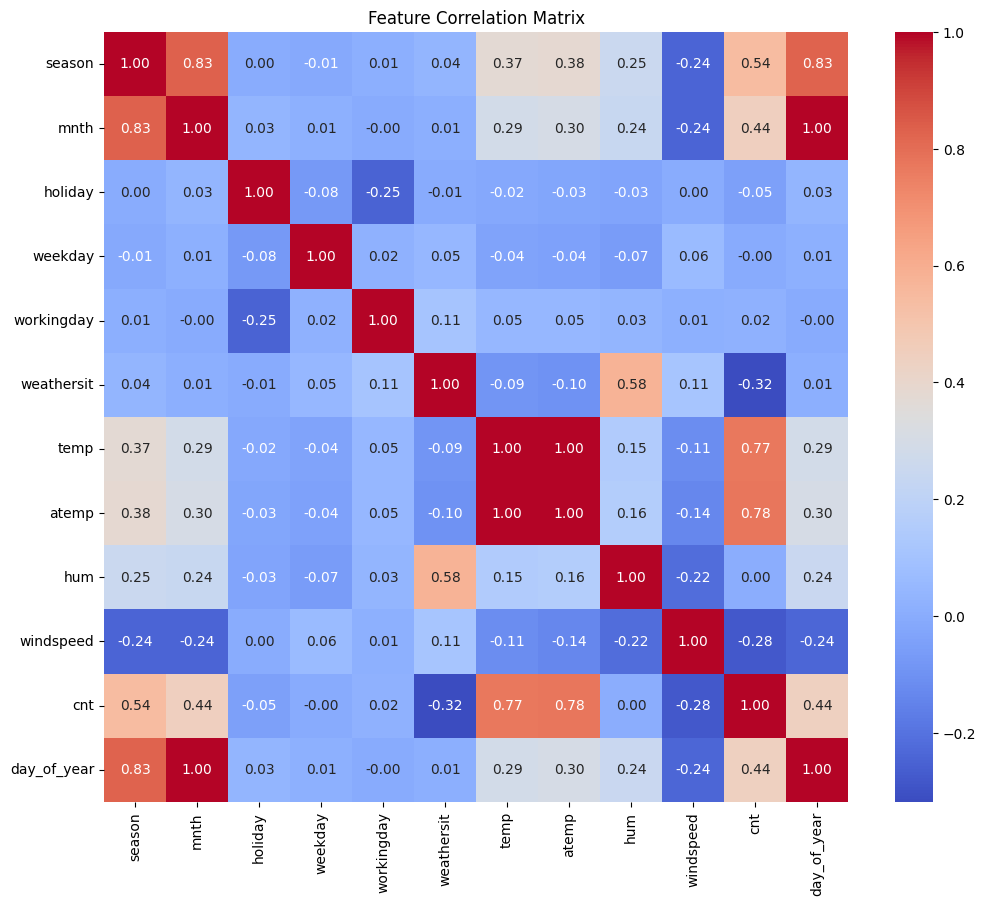

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(df11.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

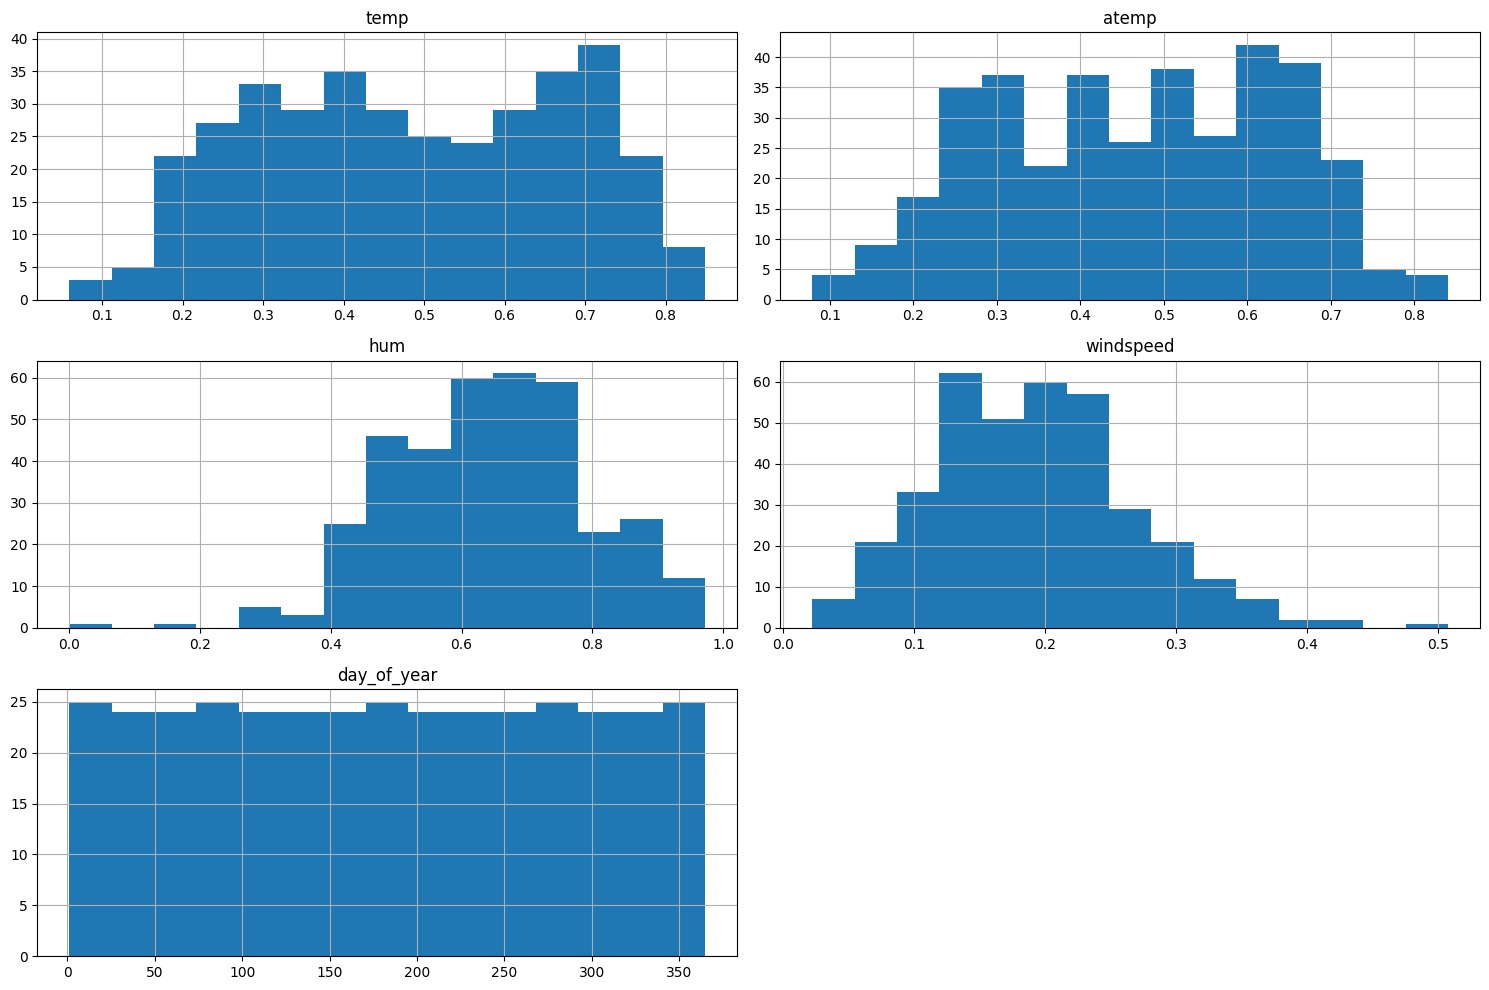

In [13]:
df11[numeric_features].hist(bins=15, figsize=(15, 10))
plt.tight_layout()

In [14]:
preprocess = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ("num", StandardScaler(), numeric_features),
])

model = Pipeline([
    ("preprocess", preprocess),
    ("model", LinearRegression())
])
df11.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day_of_year
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985,1
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801,2
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349,3
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562,4
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600,5


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    df11.drop(columns=['cnt']),
    df11['cnt'],
    test_size=0.2,
    random_state=42
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (292, 11) Test shape: (73, 11)


In [16]:
# 1. Set the tracking URI
mlflow.set_tracking_uri(uri="http://localhost:8081")

# 2. Create/Set the MLflow Experiment
mlflow.set_experiment("Predicting_Bike_Sharing_Demand")

<Experiment: artifact_location='mlflow-artifacts:/869950507924781604', creation_time=1770554309417, experiment_id='869950507924781604', last_update_time=1770554309417, lifecycle_stage='active', name='Predicting_Bike_Sharing_Demand', tags={'mlflow.experimentKind': 'custom_model_development'}>

## 1. Linear Regression

In [17]:
with mlflow.start_run(run_name="Baseline_Linear_Regression"):

    # 1) Train baseline model
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # 2) Predict + evaluate
    y_pred = lr.predict(X_test)
    rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))
    mae_lr = mean_absolute_error(y_test, y_pred)
    r2_lr = r2_score(y_test, y_pred)

    print(f"RMSE: {rmse_lr:.3f}")
    print(f"MAE : {mae_lr:.3f}")
    print(f"R2  : {r2_lr:.3f}")

    # 3) Log params + metrics
    mlflow.log_params(lr.get_params())
    mlflow.log_metrics({"rmse": rmse_lr, "mae": mae_lr, "r2": r2_lr})

    # 4) Log model with signature (use a small sample to avoid schema issues)
    X_sample = X_train.head(50)
    signature = infer_signature(X_sample, lr.predict(X_sample))

    mlflow.sklearn.log_model(
        sk_model=lr,
        artifact_path="model",
        signature=signature,
        input_example=X_sample
    )

    # 5) Tag for clarity in UI
    mlflow.set_tag("Training Info", "Baseline Linear Regression for Bike Demand (2011 Data)")

print("Run complete.")

C:\Users\Javier\anacondo3_2024\envs\ml2\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2026/02/08 21:10:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


RMSE: 691.352
MAE : 502.632
R2  : 0.744
🏃 View run Baseline_Linear_Regression at: http://localhost:8081/#/experiments/869950507924781604/runs/1f23ccd250e04e2db1fa04ddefc12829
🧪 View experiment at: http://localhost:8081/#/experiments/869950507924781604
Run complete.


## 2. Ridge Regression

In [18]:
ridge_pipeline = Pipeline(steps=[
    ("preprocess", preprocess),     # same ColumnTransformer you used for RF
    ("model", Ridge(alpha=1.0, random_state=42))
])

with mlflow.start_run(run_name="Improved_RidgeRegression"):
    ridge_pipeline.fit(X_train, y_train)
    y_pred = ridge_pipeline.predict(X_test)

    rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred))
    mae_ridge  = mean_absolute_error(y_test, y_pred)
    r2_ridge   = r2_score(y_test, y_pred)

    print(f"[RidgeRegression] RMSE: {rmse_ridge:.3f}")
    print(f"[RidgeRegression] MAE : {mae_ridge:.3f}")
    print(f"[RidgeRegression] R2  : {r2_ridge:.3f}")


    mlflow.log_param("model_type", "Ridge")
    mlflow.log_param("alpha", 1.0)
    mlflow.log_metrics({"rmse": rmse_ridge, "mae": mae_ridge, "r2": r2_ridge})

    X_sample = X_train.head(50)
    signature = infer_signature(X_sample, ridge_pipeline.predict(X_sample))

    mlflow.sklearn.log_model(
        sk_model=ridge_pipeline,
        artifact_path="model",
        signature=signature,
        input_example=X_sample
    )

print("Ridge run complete:")

C:\Users\Javier\anacondo3_2024\envs\ml2\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2026/02/08 21:10:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


[RidgeRegression] RMSE: 628.936
[RidgeRegression] MAE : 437.751
[RidgeRegression] R2  : 0.788
🏃 View run Improved_RidgeRegression at: http://localhost:8081/#/experiments/869950507924781604/runs/6067e0ceedc4440bb157bd575a72f497
🧪 View experiment at: http://localhost:8081/#/experiments/869950507924781604
Ridge run complete:


## 3. Random Forest

In [19]:
rf_pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestRegressor(
        n_estimators=500,
        max_depth=12,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    ))
])

with mlflow.start_run(run_name="Improved_RandomForest"):
    rf_pipeline.fit(X_train, y_train)
    y_pred = rf_pipeline.predict(X_test)

    rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
    mae_rf = mean_absolute_error(y_test, y_pred)
    r2_rf = r2_score(y_test, y_pred)

    print(f"[RandomForest] RMSE: {rmse_rf:.3f}")
    print(f"[RandomForest] MAE : {mae_rf:.3f}")
    print(f"[RandomForest] R2  : {r2_rf:.3f}")

    mlflow.log_param("model_type", "RandomForestRegressor")
    mlflow.log_param("n_estimators", 500)
    mlflow.log_param("max_depth", 12)
    mlflow.log_param("min_samples_leaf", 2)
    mlflow.log_metrics({"rmse": rmse_rf, "mae": mae_rf, "r2": r2_rf})

    X_sample = X_train.head(50)
    signature = infer_signature(X_sample, rf_pipeline.predict(X_sample))

    mlflow.sklearn.log_model(
        sk_model=rf_pipeline,
        artifact_path="model",
        signature=signature,
        input_example=X_sample
    )

print("RF run complete:")

C:\Users\Javier\anacondo3_2024\envs\ml2\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2026/02/08 21:10:58 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


[RandomForest] RMSE: 465.259
[RandomForest] MAE : 337.739
[RandomForest] R2  : 0.884
🏃 View run Improved_RandomForest at: http://localhost:8081/#/experiments/869950507924781604/runs/8b80561bbeb943639f979687d2897b5d
🧪 View experiment at: http://localhost:8081/#/experiments/869950507924781604
RF run complete:


## 4. Gradient Boosting

In [20]:
gbr_pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", GradientBoostingRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])
with mlflow.start_run(run_name="Improved_GradientBoosting"):
    
    # 1) Train
    gbr_pipeline.fit(X_train, y_train)

    # 2) Predict + Evaluate
    y_pred = gbr_pipeline.predict(X_test)

    rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred))  # compatible with older sklearn
    mae_gb  = mean_absolute_error(y_test, y_pred)
    r2_gb   = r2_score(y_test, y_pred)

    print(f"[GradientBoostingRegressor] RMSE: {rmse_gb:.3f}")
    print(f"[GradientBoostingRegressor] MAE : {mae_gb:.3f}")
    print(f"[GradientBoostingRegressor] R2  : {r2_gb:.3f}")

    # 3) Log params + metrics
    mlflow.log_param("model_type", "GradientBoostingRegressor")
    mlflow.log_param("n_estimators", 500)
    mlflow.log_param("learning_rate", 0.05)
    mlflow.log_param("max_depth", 3)

    mlflow.log_metrics({"rmse": rmse_gb, "mae": mae_gb, "r2": r2_gb})

    # 4) Log model with signature (use small sample to avoid schema warnings/crashes)
    X_sample = X_train.head(50)
    signature = infer_signature(X_sample, gbr_pipeline.predict(X_sample))

    mlflow.sklearn.log_model(
        sk_model=gbr_pipeline,
        artifact_path="model",
        signature=signature,
        input_example=X_sample
    )

print("Gradient Boosting run complete.")

C:\Users\Javier\anacondo3_2024\envs\ml2\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2026/02/08 21:11:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


[GradientBoostingRegressor] RMSE: 473.574
[GradientBoostingRegressor] MAE : 328.771
[GradientBoostingRegressor] R2  : 0.880
🏃 View run Improved_GradientBoosting at: http://localhost:8081/#/experiments/869950507924781604/runs/b8327218a7e349cca1e13e827e492cd8
🧪 View experiment at: http://localhost:8081/#/experiments/869950507924781604
Gradient Boosting run complete.


## Final Model Comparison

In [21]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Random Forest", "Gradient Boosting"],
    "RMSE":  [rmse_lr, rmse_ridge, rmse_rf, rmse_gb],
    "MAE":   [mae_lr,  mae_ridge,  mae_rf,  mae_gb],
    "R2":    [r2_lr,   r2_ridge,   r2_rf,   r2_gb],
})

# Sort by best RMSE (lower is better)
results = results.sort_values("RMSE").reset_index(drop=True)

display(results)

best = results.iloc[0]
print(f"Best model (lowest RMSE): {best['Model']} | RMSE={best['RMSE']:.3f} | R2={best['R2']:.3f}")

,Model,RMSE,MAE,R2
0,Random Forest,465.258917,337.739338,0.884032
1,Gradient Boosting,473.574415,328.771366,0.879849
2,Ridge Regression,628.936315,437.751120,0.788084
3,Linear Regression,691.352025,502.631812,0.743936


Best model (lowest RMSE): Random Forest | RMSE=465.259 | R2=0.884


# Task 2

In [22]:

# Make sure tracking points to your MLflow UI server
mlflow.set_tracking_uri("http://localhost:8081")
mlflow.set_experiment("Prediting_Bike_Sharing_Demand")

best_model_rf = rf_pipeline  # your trained RF Pipeline (preprocess + model)

with mlflow.start_run(run_name="Register_Best_RF"):
    # Use a small sample for signature + input example (avoids schema warnings/crashes)
    X_sample = X_train.head(50)
    signature = infer_signature(X_sample, best_model_rf.predict(X_sample))

    model_info = mlflow.sklearn.log_model(
        sk_model=best_model_rf,
        artifact_path="model",                 # keep consistent (your UI shows "model")
        signature=signature,
        input_example=X_sample,
        registered_model_name="best_model_rf"  # registers in MLflow Model Registry
    )

print("Registered model name: best_model_rf")
print("Registered model version:", model_info.registered_model_version)

C:\Users\Javier\anacondo3_2024\envs\ml2\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2026/02/08 21:11:09 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
Registered model 'best_model_rf' already exists. Creating a new version of this model...
2026/02/08 21:11:14 INFO mlflow.st

🏃 View run Register_Best_RF at: http://localhost:8081/#/experiments/464548782810879161/runs/e59f931efcc441c8ac81b95834e283ba
🧪 View experiment at: http://localhost:8081/#/experiments/464548782810879161
Registered model name: best_model_rf
Registered model version: 4


Created version '4' of model 'best_model_rf'.


In [23]:
import joblib, os

os.makedirs("artifacts", exist_ok=True)
joblib.dump(best_model_rf, "artifacts/best_model_rf.joblib")
print("Saved: artifacts/best_model_rf.joblib")

Saved: artifacts/best_model_rf.joblib


In [24]:
df11 = pd.read_csv("day_2011.csv")
df12 = pd.read_csv("day_2012.csv")

# Convert dteday -> datetime and create day_of_year (must match training)
df11["dteday"] = pd.to_datetime(df11["dteday"], dayfirst=True)
df12["dteday"] = pd.to_datetime(df12["dteday"], dayfirst=True)

df11["day_of_year"] = df11["dteday"].dt.dayofyear
df12["day_of_year"] = df12["dteday"].dt.dayofyear

In [27]:
# Target
target = "cnt"

# If you previously used dteday as features, the brief says extract numeric and drop raw date. :contentReference[oaicite:2]{index=2}
# Since your models already work, just keep consistent with Task 1:
drop_cols = ["dteday"]  # keep simple and consistent

X11 = df11.drop(columns=[target] + drop_cols)
y11 = df11[target]

X12 = df12.drop(columns=[target] + drop_cols)
y12 = df12[target]

# Ensure same column order
X12 = X12[X11.columns]

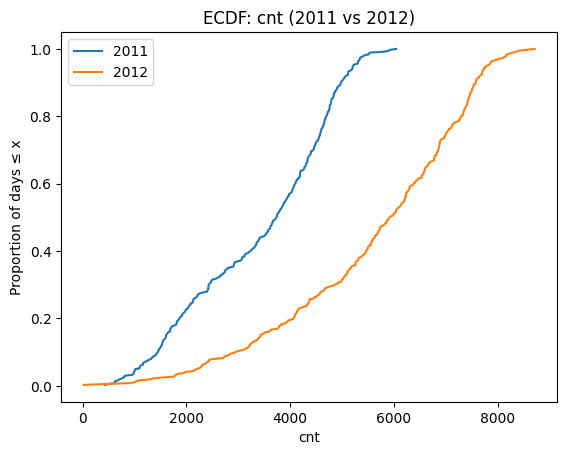

In [29]:
def plot_ecdf(data, label):
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    plt.plot(x, y, label=label)

plt.figure()
plot_ecdf(df11["cnt"].dropna(), "2011")
plot_ecdf(df12["cnt"].dropna(), "2012")
plt.title("ECDF: cnt (2011 vs 2012)")
plt.xlabel("cnt")
plt.ylabel("Proportion of days ≤ x")
plt.legend()
plt.show()

In [30]:
drift_stats = pd.DataFrame({
    "mean_2011": X11.mean(numeric_only=True),
    "std_2011":  X11.std(numeric_only=True),
    "mean_2012": X12.mean(numeric_only=True),
    "std_2012":  X12.std(numeric_only=True),
})

drift_stats["mean_diff"] = drift_stats["mean_2012"] - drift_stats["mean_2011"]
drift_stats["mean_diff_%"] = (drift_stats["mean_diff"] / (drift_stats["mean_2011"].replace(0, np.nan))) * 100

drift_stats = drift_stats.sort_values("mean_diff_%", ascending=False)
drift_stats.head(10)

,mean_2011,std_2011,mean_2012,std_2012,mean_diff,mean_diff_%
holiday,0.027397,0.163462,0.030055,0.170971,0.002657,9.699454
temp,0.486665,0.189596,0.504081,0.176112,0.017416,3.578613
atemp,0.466835,0.168836,0.481852,0.156756,0.015017,3.216714
day_of_year,183.000000,105.510663,183.500000,105.799338,0.500000,0.273224
season,2.498630,1.110946,2.494536,1.112185,-0.004095,-0.163875
mnth,6.526027,3.452584,6.513661,3.455958,-0.012366,-0.189490
workingday,0.684932,0.465181,0.683060,0.465921,-0.001871,-0.273224
weekday,3.008219,2.006155,2.986339,2.006108,-0.021880,-0.727353
windspeed,0.191403,0.076890,0.189572,0.078194,-0.001830,-0.956279
weathersit,1.421918,0.571831,1.368852,0.516057,-0.053065,-3.731956


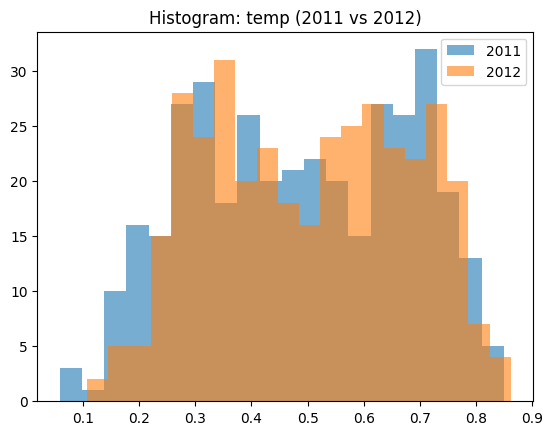

C:\Users\Javier\AppData\Local\Temp\ipykernel_42752\3824372105.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([X11[feature].dropna(), X12[feature].dropna()], labels=["2011", "2012"])


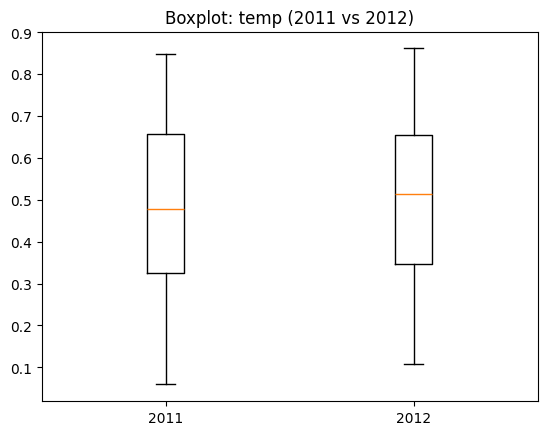

In [31]:
# Pick a likely drifting numeric feature (you can change after seeing drift_stats)
feature = "temp" 

plt.figure()
plt.hist(X11[feature], bins=20, alpha=0.6, label="2011")
plt.hist(X12[feature], bins=20, alpha=0.6, label="2012")
plt.title(f"Histogram: {feature} (2011 vs 2012)")
plt.legend()
plt.show()

plt.figure()
plt.boxplot([X11[feature].dropna(), X12[feature].dropna()], labels=["2011", "2012"])
plt.title(f"Boxplot: {feature} (2011 vs 2012)")
plt.show()

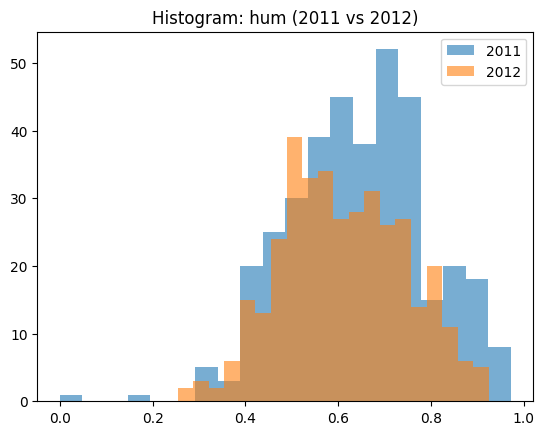

C:\Users\Javier\AppData\Local\Temp\ipykernel_42752\2145185862.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([X11[feature].dropna(), X12[feature].dropna()], labels=["2011", "2012"])


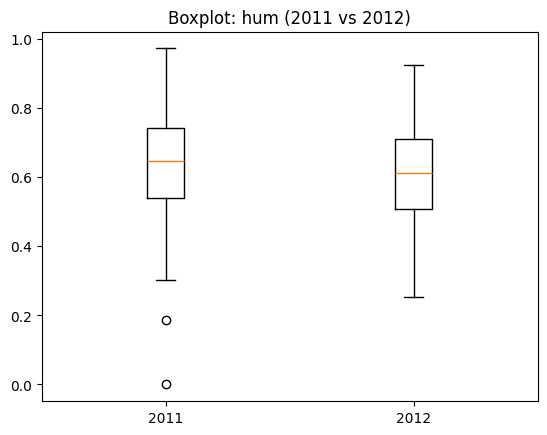

In [32]:
# Pick a likely drifting numeric feature (you can change after seeing drift_stats)
feature = "hum"

plt.figure()
plt.hist(X11[feature], bins=20, alpha=0.6, label="2011")
plt.hist(X12[feature], bins=20, alpha=0.6, label="2012")
plt.title(f"Histogram: {feature} (2011 vs 2012)")
plt.legend()
plt.show()

plt.figure()
plt.boxplot([X11[feature].dropna(), X12[feature].dropna()], labels=["2011", "2012"])
plt.title(f"Boxplot: {feature} (2011 vs 2012)")
plt.show()

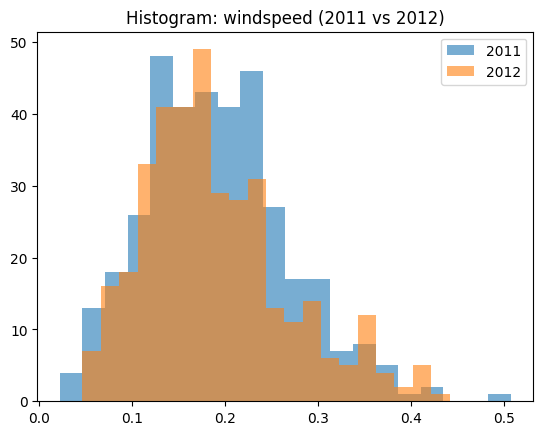

C:\Users\Javier\AppData\Local\Temp\ipykernel_42752\382548952.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([X11[feature].dropna(), X12[feature].dropna()], labels=["2011", "2012"])


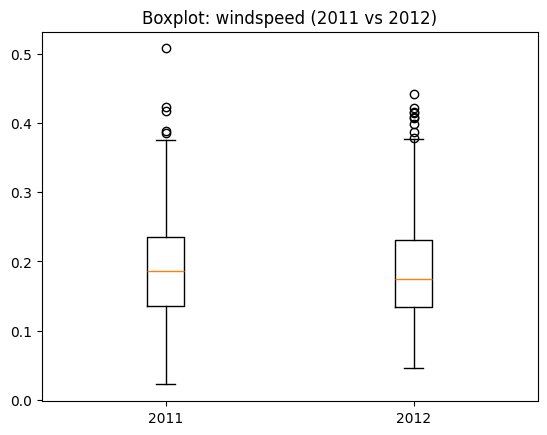

In [33]:
# Pick a likely drifting numeric feature (you can change after seeing drift_stats)
feature =  "windspeed"

plt.figure()
plt.hist(X11[feature], bins=20, alpha=0.6, label="2011")
plt.hist(X12[feature], bins=20, alpha=0.6, label="2012")
plt.title(f"Histogram: {feature} (2011 vs 2012)")
plt.legend()
plt.show()

plt.figure()
plt.boxplot([X11[feature].dropna(), X12[feature].dropna()], labels=["2011", "2012"])
plt.title(f"Boxplot: {feature} (2011 vs 2012)")
plt.show()

In [34]:
best_model = joblib.load("artifacts/best_model_rf.joblib")

# Predictions
pred11 = best_model.predict(X11)
pred12 = best_model.predict(X12)

# Metrics
rmse11 = np.sqrt(mean_squared_error(y11, pred11))
mae11  = mean_absolute_error(y11, pred11)
r2_11  = r2_score(y11, pred11)

rmse12 = np.sqrt(mean_squared_error(y12, pred12))
mae12  = mean_absolute_error(y12, pred12)
r2_12  = r2_score(y12, pred12)

print("2011 -> RMSE:", rmse11, " MAE:", mae11, " R2:", r2_11)
print("2012 -> RMSE:", rmse12, " MAE:", mae12, " R2:", r2_12)

print("\nChange (2012 - 2011)")
print("ΔRMSE:", rmse12 - rmse11)
print("ΔMAE :", mae12 - mae11)
print("ΔR2  :", r2_12 - r2_11)

2011 -> RMSE: 312.5518939427885  MAE: 207.40614928136554  R2: 0.9484697332876207
2012 -> RMSE: 2271.493946487939  MAE: 2118.592169637047  R2: -0.6171562292972947

Change (2012 - 2011)
ΔRMSE: 1958.9420525451505
ΔMAE : 1911.1860203556814
ΔR2  : -1.5656259625849156


In [35]:
print("Missing in 2012:", set(X11.columns) - set(X12.columns))
print("Extra in 2012:", set(X12.columns) - set(X11.columns))
print("Same order:", list(X11.columns) == list(X12.columns))

Missing in 2012: set()
Extra in 2012: set()
Same order: True


In [36]:
print("2011 cnt mean/std:", y11.mean(), y11.std())
print("2012 cnt mean/std:", y12.mean(), y12.std())

2011 cnt mean/std: 3405.7616438356163 1378.7536658345591
2012 cnt mean/std: 5599.934426229508 1788.6678676863905


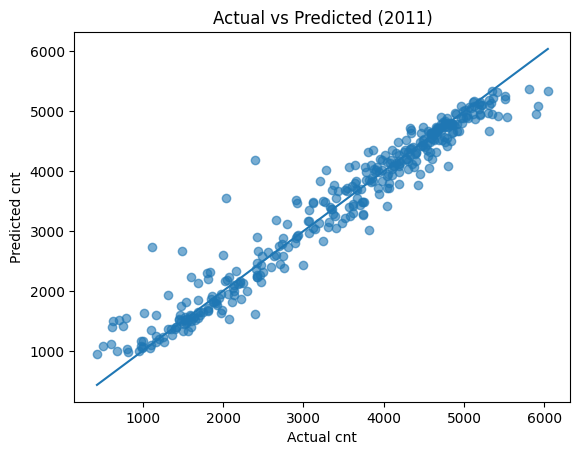

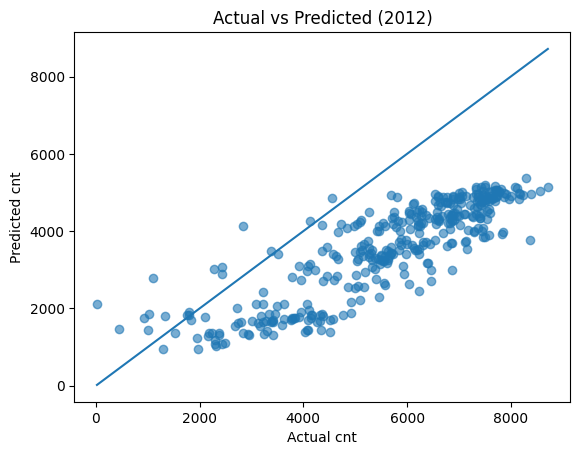

In [37]:
pred11 = best_model.predict(X11)
pred12 = best_model.predict(X12)

# 2011
plt.figure()
plt.scatter(y11, pred11, alpha=0.6)
plt.title("Actual vs Predicted (2011)")
plt.xlabel("Actual cnt")
plt.ylabel("Predicted cnt")
plt.plot([y11.min(), y11.max()], [y11.min(), y11.max()])  # diagonal
plt.show()

# 2012
plt.figure()
plt.scatter(y12, pred12, alpha=0.6)
plt.title("Actual vs Predicted (2012)")
plt.xlabel("Actual cnt")
plt.ylabel("Predicted cnt")
plt.plot([y12.min(), y12.max()], [y12.min(), y12.max()])
plt.show()

In [38]:
drift_stats = pd.DataFrame({
    "mean_2011": X11.mean(numeric_only=True),
    "std_2011":  X11.std(numeric_only=True),
    "mean_2012": X12.mean(numeric_only=True),
    "std_2012":  X12.std(numeric_only=True),
})
drift_stats["mean_diff"] = drift_stats["mean_2012"] - drift_stats["mean_2011"]
drift_stats["mean_diff_%"] = (drift_stats["mean_diff"] / drift_stats["mean_2011"].replace(0, np.nan)) * 100

drift_stats.sort_values("mean_diff_%", ascending=False).head(8)

,mean_2011,std_2011,mean_2012,std_2012,mean_diff,mean_diff_%
holiday,0.027397,0.163462,0.030055,0.170971,0.002657,9.699454
temp,0.486665,0.189596,0.504081,0.176112,0.017416,3.578613
atemp,0.466835,0.168836,0.481852,0.156756,0.015017,3.216714
day_of_year,183.000000,105.510663,183.500000,105.799338,0.500000,0.273224
season,2.498630,1.110946,2.494536,1.112185,-0.004095,-0.163875
mnth,6.526027,3.452584,6.513661,3.455958,-0.012366,-0.189490
workingday,0.684932,0.465181,0.683060,0.465921,-0.001871,-0.273224
weekday,3.008219,2.006155,2.986339,2.006108,-0.021880,-0.727353


## Actionable Solution

In [39]:
# Load 2012
df12 = pd.read_csv("day_2012.csv")
df12["dteday"] = pd.to_datetime(df12["dteday"], dayfirst=True)
df12["day_of_year"] = df12["dteday"].dt.dayofyear

# Define X/y (keep consistent with your model)
y_2012 = df12["cnt"]
X_2012 = df12.drop(columns=["cnt", "dteday"])

# Use the same feature lists you used in Task 1
# (Make sure these variables already exist)
# categorical_features = [...]
# numeric_features = [...]

# Train/test split on 2012
X_train_12, X_test_12, y_train_12, y_test_12 = train_test_split(
    X_2012, y_2012, test_size=0.2, random_state=42
)

# Preprocess
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", StandardScaler(), numeric_features),
    ],
    remainder="drop"
)

# Model (same structure as your selected model)
rf_retrain_2012 = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestRegressor(
        n_estimators=500,
        max_depth=12,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    ))
])

# Train on 2012
rf_retrain_2012.fit(X_train_12, y_train_12)

# Evaluate on 2012 holdout
pred_test_12 = rf_retrain_2012.predict(X_test_12)

rmse_retrain = np.sqrt(mean_squared_error(y_test_12, pred_test_12))
mae_retrain  = mean_absolute_error(y_test_12, pred_test_12)
r2_retrain   = r2_score(y_test_12, pred_test_12)

print("Post-retrain (train 2012, test 2012 holdout):")
print("RMSE:", rmse_retrain)
print("MAE :", mae_retrain)
print("R2  :", r2_retrain)

Post-retrain (train 2012, test 2012 holdout):
RMSE: 726.8991582674442
MAE : 510.98147000869375
R2  : 0.8390270614653961


### Performance degradation observed?

Yes. When applying the selected 2011-trained model to the drifted 2012 dataset, performance degraded severely (RMSE increased from ~313 on 2011 to ~2271 on 2012; MAE increased from ~207 to ~2119; R² dropped from ~0.95 to negative). This indicates the model no longer generalises to 2012 and shows strong model drift.

### Which drifting features likely contributed?

holiday increased the most (~+9.7%), which changes commuting/leisure travel patterns and therefore bike demand.

temp and atemp increased (~+3.6% and ~+3.2%), and you also observed drift in weather distributions (temp/hum/windspeed plots). Weather strongly drives ride decisions.

target drift is also present: your ECDF for cnt shows demand in 2012 shifted higher overall, explaining why the 2011 model systematically underpredicts high-demand days.

### Operational action 

Retrain the model using day_2012.csv data. This recommendation is supported by both drift evidence (feature distribution shifts + target shift) and the observed performance drop on 2012. After retraining on 2012 and evaluating on a 2012 holdout set, performance improved substantially (RMSE ~726.9, MAE ~511.0, R² ~0.839), confirming retraining as the correct response.